# RNS Vectorization timing

This notebook parses `Result.csv`, output of `./timing`.

You may need to install the json module and matplotlib:
```shell
pip install json
pip install matplotlib
```

In [1]:
import json
import matplotlib.pyplot as plt
f = open("Results.json", "r")
data = json.loads(f.read())

In [25]:
def pick(data: dict, operation: str, mode: str, measure: str):
    res = []
    for m in data[operation][mode]:
        res.append(m[measure])
    return min(res)

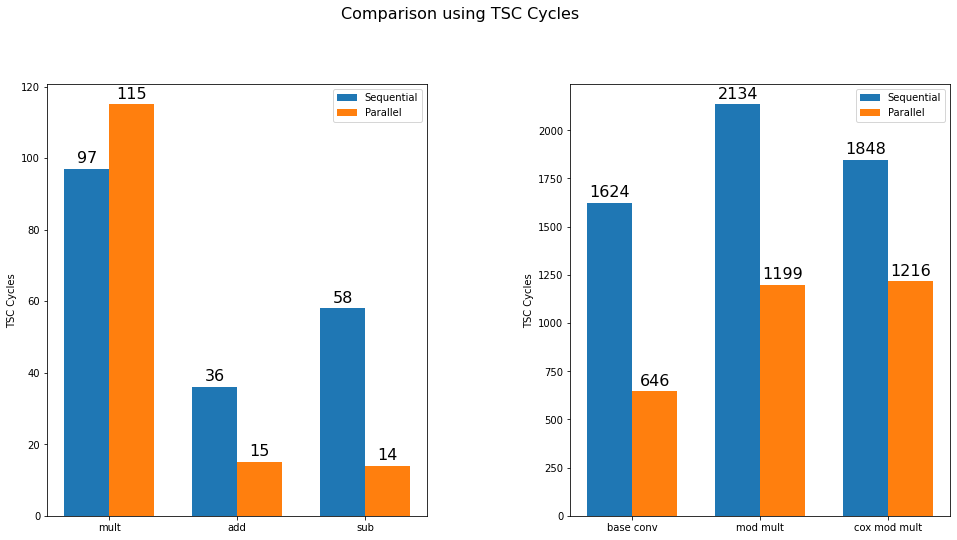

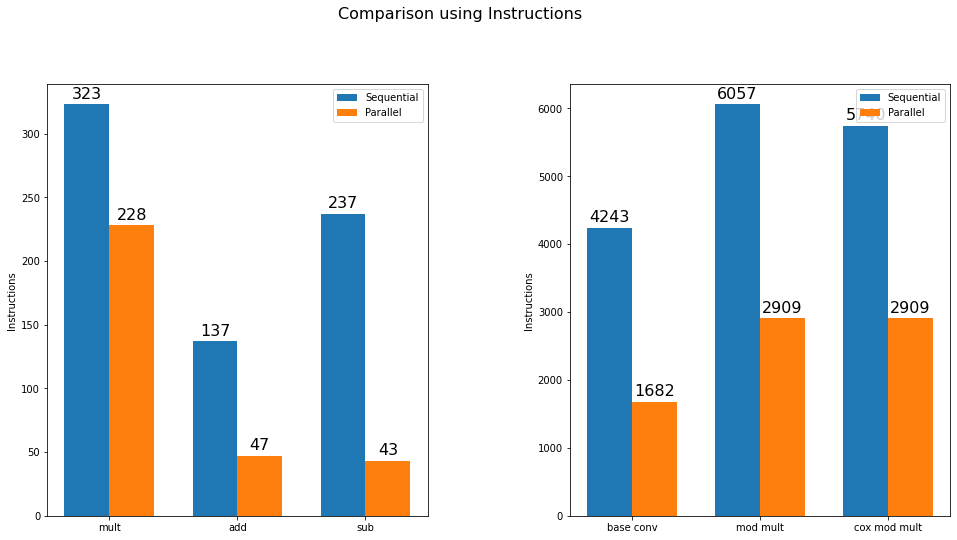

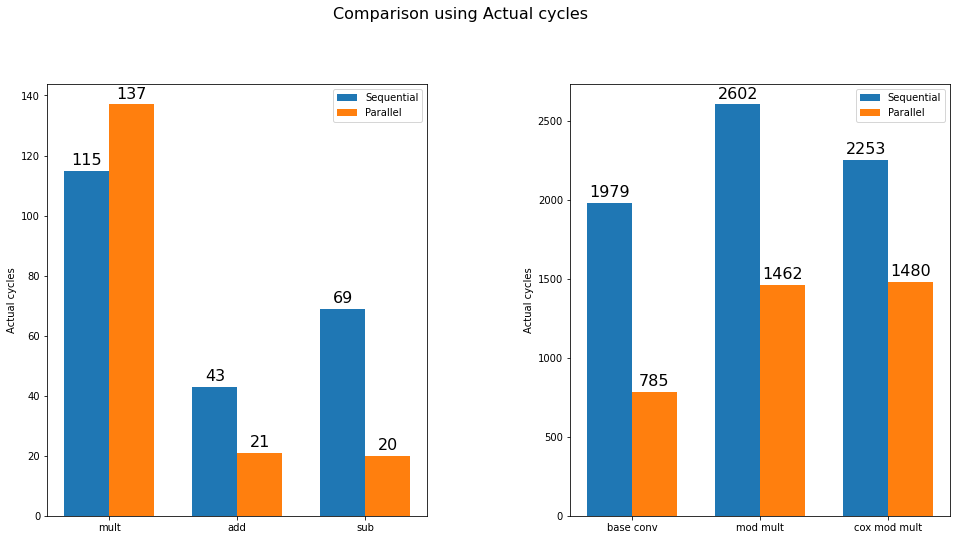

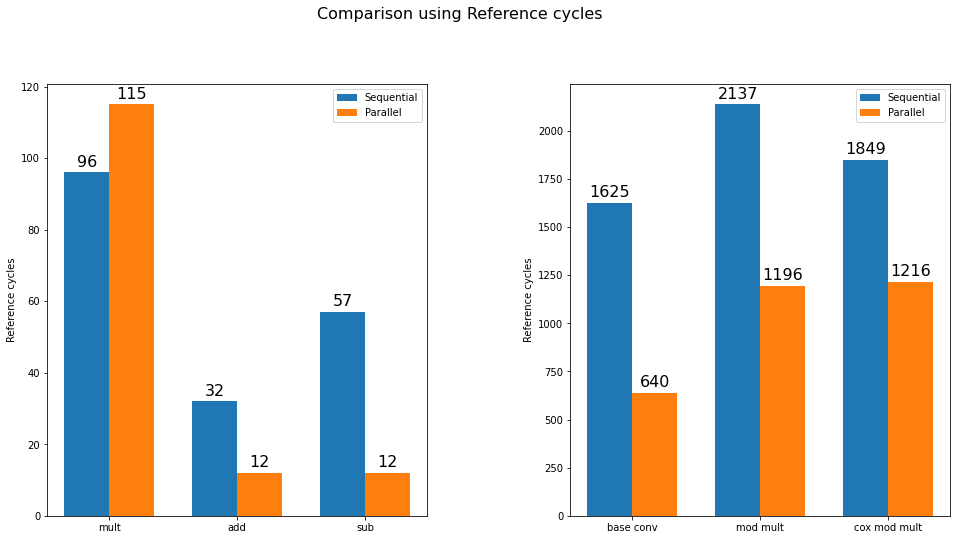

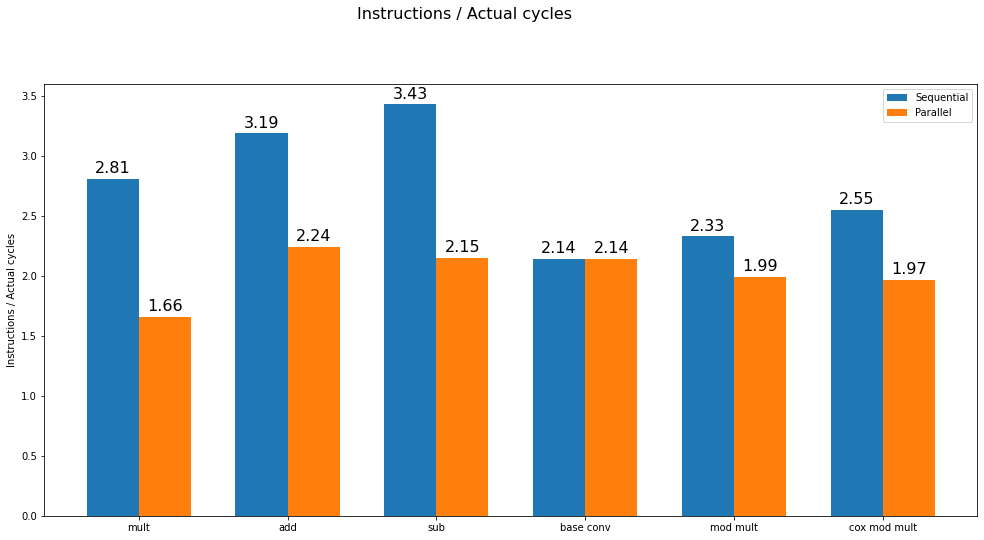

In [26]:
import matplotlib.pyplot as plt
import numpy as np

keys = ["multiplication", "addition", "substraction", "base_conversion", "modular_multiplication", "cox_mod_mul"]

for measure in ["TSC Cycles", "Instructions", "Actual cycles", "Reference cycles"]:

    labels = ['mult', 'add', 'sub', "base conv", "mod mult", "cox mod mult"]
    sequential = [pick(data, op, "sequential", measure) for op in keys]
    parallel = [pick(data, op, "parallel", measure) for op in keys]

    x = np.arange(3)  # the label locations
    x1 = np.arange(len(keys)//2)
    width = 0.35  # the width of the bars

    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    rects1 = ax1.bar(x - width/2, sequential[:3], width, label='Sequential')
    rects2 = ax1.bar(x + width/2, parallel[:3], width, label='Parallel')

    rects3 = ax2.bar(x1 - width/2, sequential[3:], width, label='Sequential')
    rects4 = ax2.bar(x1 + width/2, parallel[3:], width, label='Parallel')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.suptitle('Comparison using ' + measure, fontsize=16)

    ax1.set_ylabel(measure)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels[:3])
    ax1.legend()

    ax2.set_ylabel(measure)
    ax2.set_xticks(x1)
    ax2.set_xticklabels(labels[3:])
    ax2.legend()

    ax1.bar_label(rects1, padding=3, fontsize=16)
    ax1.bar_label(rects2, padding=3, fontsize=16)

    ax2.bar_label(rects3, padding=3, fontsize=16)
    ax2.bar_label(rects4, padding=3, fontsize=16)

    fig.tight_layout()
    fig.set_size_inches(15,8)
    

# Instructions per cycles
    
labels = ['mult', 'add', 'sub', "base conv", "mod mult", "cox mod mult"]

seq_instructions = [pick(data, op, "sequential", "Instructions") for op in keys]
seq_tsc_cycles = [pick(data, op, "sequential", "Actual cycles") for op in keys]

par_instructions = [pick(data, op, "parallel", "Instructions") for op in keys]
par_tsc_cycles = [pick(data, op, "parallel", "Actual cycles") for op in keys]

sequential_ipc = [round(i / j,2) for i, j in zip(seq_instructions, seq_tsc_cycles)]
parallel_ipc = [round(i / j, 2) for i, j in zip(par_instructions, par_tsc_cycles)]
x = np.arange(len(labels))  # the label locations

fig, ax1 = plt.subplots()

rects1 = ax1.bar(x - width/2, sequential_ipc, width, label='Sequential')
rects2 = ax1.bar(x + width/2, parallel_ipc, width, label='Parallel')

fig.suptitle("Instructions / Actual cycles", fontsize=16)

ax1.set_ylabel("Instructions / Actual cycles")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


ax1.bar_label(rects1, padding=3, fontsize=16)
ax1.bar_label(rects2, padding=3, fontsize=16)

fig.tight_layout()
fig.set_size_inches(15,8)


plt.show()


In [46]:
res = []
operations = list(data.keys())
modes = list(data[operations[0]].keys())
measures = list(data[operations[0]][modes[0]][0].keys())


for mode in modes:
    for operation in operations:
        for measure in measures:
            print(operation + " " + mode + " " + measure + " " + str(min([m[measure] for m in data[operation][mode]])))


multiplication sequential TSC Cycles 97
multiplication sequential Instructions 323
multiplication sequential Actual cycles 115
multiplication sequential Reference cycles 96
addition sequential TSC Cycles 36
addition sequential Instructions 137
addition sequential Actual cycles 43
addition sequential Reference cycles 32
substraction sequential TSC Cycles 58
substraction sequential Instructions 237
substraction sequential Actual cycles 69
substraction sequential Reference cycles 57
base_conversion sequential TSC Cycles 1624
base_conversion sequential Instructions 4243
base_conversion sequential Actual cycles 1979
base_conversion sequential Reference cycles 1625
modular_multiplication sequential TSC Cycles 2134
modular_multiplication sequential Instructions 6057
modular_multiplication sequential Actual cycles 2602
modular_multiplication sequential Reference cycles 2137
cox_mod_mul sequential TSC Cycles 1848
cox_mod_mul sequential Instructions 5740
cox_mod_mul sequential Actual cycles 2253